<h1 style="color: #4A90E2;">Diamond Price Analysis: Predicting Price with Random Forest Models</h1>


<p style="color: #333333; font-size: 16px;">
    This Jupyter notebook delves into the intricacies of diamond pricing, utilizing a <strong style="color: #E94E77;">Random Forest</strong> model to predict prices based on various attributes such as carat weight, cut, color, and clarity etc. By harnessing the power of machine learning, we aim to uncover hidden patterns and provide insights that can guide decision-making in the diamond market.
</p>

In [3]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('M6_T2_V1_Diamonds.csv')
df.describe(include='all')

,carat,cut,color,clarity,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,5324.250000,6.540000,6.540000,4.040000


In [4]:
# Check for null values in data

print(df.isnull().values.any())

False


In [5]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
price        int64
x          float64
y          float64
z          float64
dtype: object


<h1 style="font-size:3em">Exploratory Data Analysis</h1>

# Analysing Categorical Variables
Here we will try to analyze distribution of price across different catogeries of diamonds present in the dataset. To do so, we will use box plots to help us visualize distribution of price across each category as well as summary statistics associated with it. 

## Box plot of price distribution across cut categories

Text(0, 0.5, 'Price')

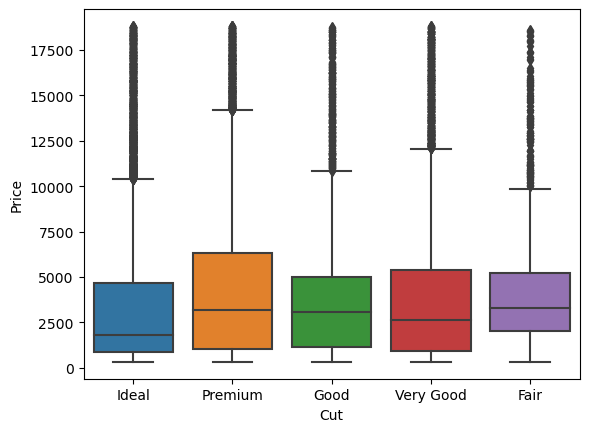

In [6]:
# box plot for distribution of prices based on each cut category

sns.boxplot(x=df['cut'], y=df['price'])
plt.xlabel('Cut')
plt.ylabel('Price')

## Box plot of price distribution across color categories

Text(0, 0.5, 'Price')

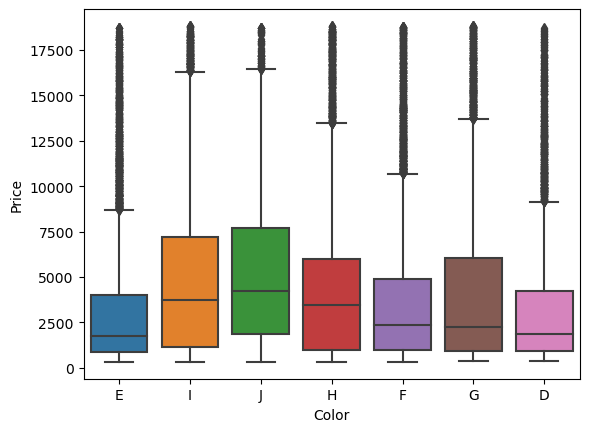

In [7]:
# box plot for distribution of prices based on each color category

sns.boxplot(x=df['color'], y=df['price'])
plt.xlabel('Color')
plt.ylabel('Price')

## Box plot of price distribution across clarity categories

Text(0, 0.5, 'Price')

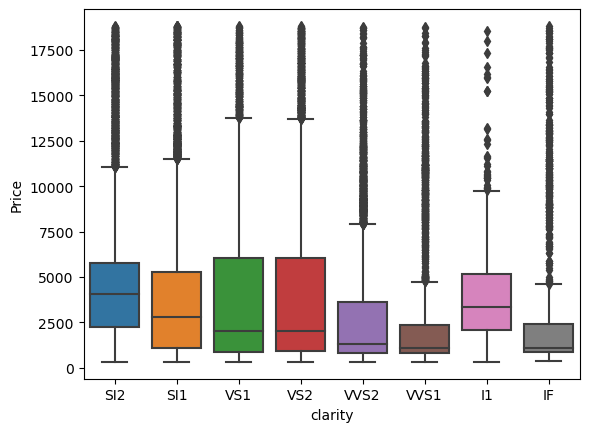

In [8]:
# box plot for distribution of prices based on each clarity category

sns.boxplot(x=df['clarity'], y=df['price'])
plt.xlabel('clarity')
plt.ylabel('Price')

## Conclusions
From the box plots for price distribution across different categories like cut, color and clarity, we can conclude the following:
* The median price across different categories is mostly between USD 2500 to 5000
* The interquartile range (IQR) also seems to be arount the price range USD 2500 to 5000, with slight variations above and below.

# Analysing Numerical Variables
Now, we will try to examine relationship between different numerical variables and price. To do so, we would create regression plots, and then analyze the strength of relationship between variables and price using regression plots and correlation matrix. 

## Regression plot of carat vs price

<Axes: xlabel='carat', ylabel='price'>

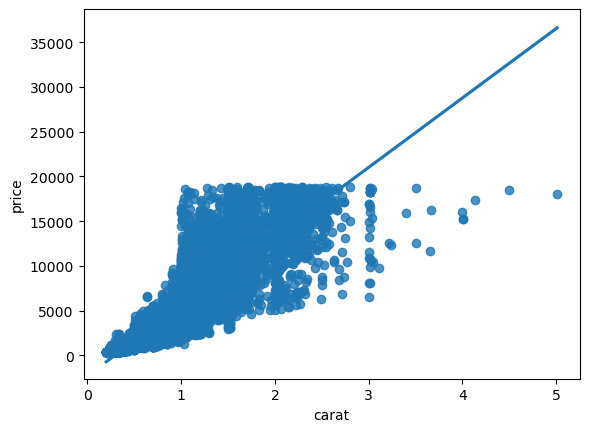

In [9]:
sns.regplot(x=df['carat'], y=df['price'])

## Regression plot of length(x) vs price

Text(0.5, 0, 'Length(x)')

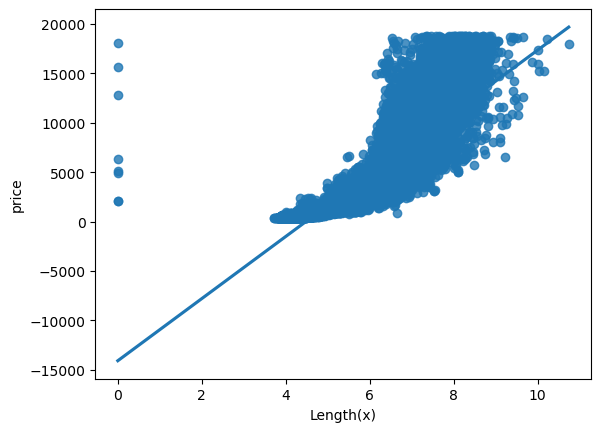

In [10]:
sns.regplot(x=df['x'], y=df['price'])
plt.xlabel('Length(x)')

## Regression plot of width(y) vs price

Text(0.5, 0, 'Width(y)')

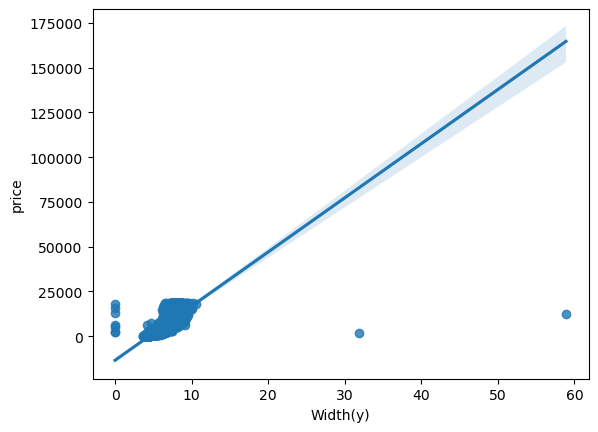

In [11]:
sns.regplot(x=df['y'], y=df['price'])
plt.xlabel('Width(y)')

## Regression plot of depth(z) vs price

Text(0.5, 0, 'Depth(z)')

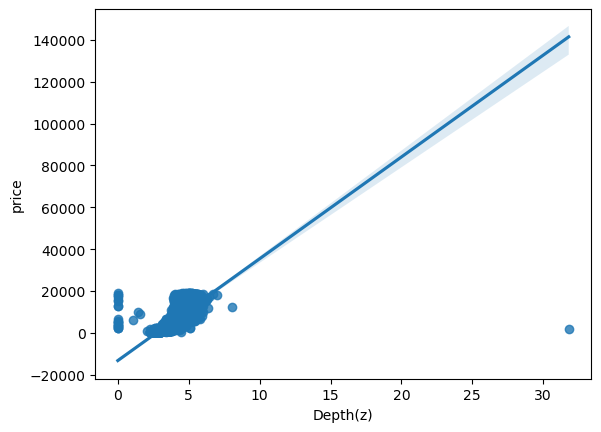

In [12]:
sns.regplot(x=df['z'], y=df['price'])
plt.xlabel('Depth(z)')

## Correlation Matrix

In [13]:
df[['carat', 'x', 'y', 'z', 'price']].corr()

,carat,x,y,z,price
carat,1.000000,0.975094,0.951722,0.953387,0.921591
x,0.975094,1.000000,0.974701,0.970772,0.884435
y,0.951722,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.970772,0.952006,1.000000,0.861249
price,0.921591,0.884435,0.865421,0.861249,1.000000


## Conclusion
After examining the regression plots and correlation matrix above, we can safely conclude that there exists a highly positive correlation between each of the variables: carat, length(x), width(y), depth(z) and the target price. Thus all of these variables can be used as feature variables to predict the target price.

<h1 style="font-size:3em">Data preparation and Model building</h1>
<br>
<p>Here we will be using a pipeline to build model which will make it easy to clean the data, preprocess it and apply transformations to it.</p>

## Data preparation

In [14]:
from sklearn.model_selection import train_test_split


# Separate target from predictors
y = df['price']
X = df.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=0)

# Select categorical columns with relatively low cardinality
# In our case as we saw above, all the categorical variables have cardinality less than 10
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
cols = categorical_cols + numerical_cols
X_train = X_train_full[cols].copy()
X_valid = X_valid_full[cols].copy()

In [15]:
X_train.head()

,cut,color,clarity,carat,x,y,z
441,Premium,H,SI2,0.89,6.26,6.23,3.76
50332,Very Good,D,SI1,0.70,5.57,5.61,3.58
35652,Ideal,G,VVS2,0.31,4.33,4.31,2.71
9439,Very Good,H,VS1,0.90,6.12,6.17,3.83
15824,Good,F,VS2,1.01,6.52,6.49,3.94


## Preprocessing

Below we do the following two things:
* Impute missing values in the numerical data (though in our data there are none)
* Impute missing values (none in our case) and apply one hot encoding to categorical data

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Define the model

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

## Create the pipeline

In [18]:
# Bundle preprocessing and modeling code in a pipeline
diamond_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
diamond_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = diamond_pipeline.predict(X_valid)

## Validating the model
<p>To validate the model we will use the Mean Absolute Error(MAE) loss function</p>

In [19]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

diamond_price_mae = mean_absolute_error(y_valid, preds)

print('Mean absolute error is: ', diamond_price_mae)

Mean absolute error is:  274.63997206644547


In [20]:
# Comparing first five test prices and predicted prices

j = 0;
for i, v in y_valid.items():
    if j == 5:
        break
    
    print(v, preds[j])
    j += 1

4733 4815.19
6424 7230.75
5510 5332.04
8770 10995.731666666665
4493 4579.09


## Saving output to file

In [21]:
# Save test predictions to file

output = pd.DataFrame({'Id': X_valid.index,
                       'ActualPrice': y_valid,
                       'PredictedPrice': preds})
output.to_csv('output.csv', index=False)